# Random Chess

Can you calibrate a probability distribution on pieces and their points to make a random game of chess converge towards mate faster?
- vary board size and try custom rules I thought of
    - like cellular automata
    - also with multiple moves at once

- Simulated annealing?

cOnnection to criticality and ising model, spin glasses

then deploy to Javascript as fun website widget

random walk gist:
```python
for t in range(moves):
    team_turn = TEAMS[t%2]
    avail_pieces = pieces[team_turn]
    if avail_pieces['K'].check:
        #move to prevent check
        # if no moves, king.mate=True
    else: 
        piece = random.choice(avail_pieces)
        piece.move('random')
```

maybe `castle` should be it's own piece in avail_pieces?

resources:
- [minimax](https://diatomenterprises.com/ruby-and-recursion-find-out-all-possible-chess-knights-movements-using-minimax-algorithm/)

In [5]:
{e:False for e in ['enc_l', 'enc_d', 'enc_u', 'enc_r']}.keys()

dict_keys(['enc_l', 'enc_d', 'enc_u', 'enc_r'])

[(4, 5), (6, 3), (6, 5), (4, 3), (3, 6), (7, 2), (7, 6), (3, 2)]

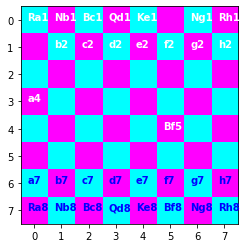

In [1]:
%matplotlib inline
from chess.game import Chess

game = Chess()
game.move('a2', (0,3))
print()

# game.move('Nb1', (0,2))


game.pick('Bf1').position = (5,4)
game.show()
game.pick('Bf5').valid_moves(game.board())

In [5]:
x=[123123,123]
x.extend([2,3,4])
x

[123123, 123, 2, 3, 4]

In [3]:
from itertools import permutations
absmult = lambda x: abs(x[0]*x[1])
list(set([i for i in permutations([1,1,-1,-1], 2) ]))


[(-1, 1), (1, -1), (1, 1), (-1, -1)]

# todo
- fix rook bug

- complete all moves for other pieces


In [46]:
class A:
    def do(self):
        return self.x
    def do2(self):
        return self.thing()
    
class Arr:
    def __init__(self):
        self.items = [0,B(),0]
        self.pos = [0, B.id_, 0]
        
    def __repr__(self):
        return 'hi'
        
    def update(self, piece):
        self.items[piece.pos] = 
class B(A, Arr):
    def __init__(self):
        self.x = 3
        self.id_ = hash(random.random())
        
    
    def thing(self):
        return [1,2]

#     def where(self, arr_obj):
#         return arr_obj.arr.index(self)
    

    
    
b = B()

b.do()

a = Arr()
a.arr[1].where(a)

SyntaxError: invalid syntax (<ipython-input-46-2ab68dd1e887>, line 16)

In [28]:
class X:
    pass

class B(X):
    pass

x=B()
type(x)

__main__.B